In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav
import librosa
import scipy.signal as sig

In [2]:
nfft = 512
hop = 256
mels = 80

In [3]:
path = '/home/tracek/Data/BAD2017/all_16khz/84541.wav'
fs, audio = wav.read(path)

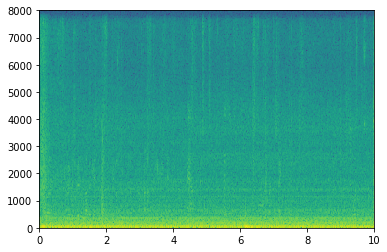

In [4]:
Pxx, freqs, bins, im  = plt.specgram(audio, NFFT=nfft, Fs=fs, noverlap=hop)

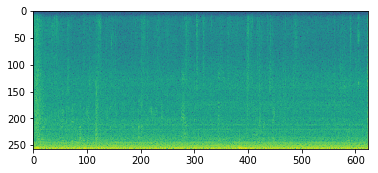

In [5]:
plt.imshow(np.flipud(np.log10(Pxx)))

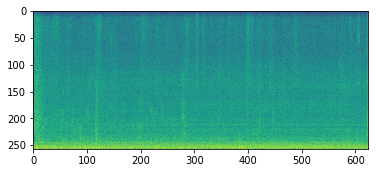

In [6]:
freq, time, spectrogram = sig.spectrogram(audio, fs=fs, nperseg=nfft, noverlap=hop)
spectrogram = np.log10(np.flipud(spectrogram))
plt.imshow(spectrogram)

In [7]:
spectrogram.shape

(257, 624)

In [8]:
import yaafelib

feature_plan = yaafelib.FeaturePlan(sample_rate=fs)
success = feature_plan.loadFeaturePlan('features.config')
engine = yaafelib.Engine()
engine.load(feature_plan.getDataFlow())
afp = yaafelib.AudioFileProcessor()
afp.processFile(engine, path)
feats = engine.readAllOutputs()

MelSpectrum shape:  (625, 80)


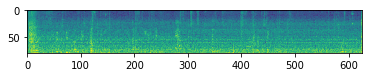

In [9]:
print('MelSpectrum shape: ', feats['MelSpectrum'].shape)
plt.imshow(np.flipud(np.log10(feats['MelSpectrum'].T)))

CQT shape:  (625, 130)


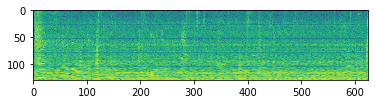

In [10]:
print('CQT shape: ', feats['CQT'].shape)
plt.imshow(np.flipud(np.log10(feats['CQT'].T)))

CQT2 shape:  (625, 130)


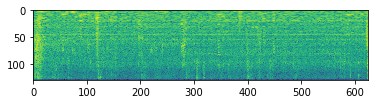

In [11]:
print('CQT2 shape: ', feats['CQT2'].shape)
plt.imshow(np.log10(feats['CQT2'].T))

MagnitudeSpectrum shape:  (257, 625)


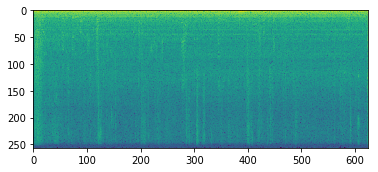

In [12]:
print('MagnitudeSpectrum shape: ', feats['MagnitudeSpectrum'].T.shape)
plt.imshow(np.log10(feats['MagnitudeSpectrum'].T))

In [13]:
feats['MelSpectrum'].shape

(625, 80)

In [14]:
path

'/home/tracek/Data/BAD2017/all_16khz/84541.wav'

In [15]:
y, sr = librosa.load(path)
x = librosa.core.hybrid_cqt(y, sr, hop_length=256, n_bins=80)

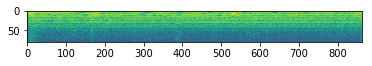

In [16]:
plt.imshow(np.log10(x))

In [17]:
x.shape

(80, 862)

In [18]:
y, sr = librosa.load(path)
mellibrosa = librosa.feature.melspectrogram(y, sr=sr, n_fft=nfft, hop_length=hop, n_mels=mels)
print('21khz {}'.format(mellibrosa.shape))

21khz (80, 862)


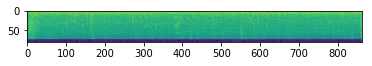

In [19]:
plt.imshow(np.log10(mellibrosa))

In [ ]:
x = np.arange(15).reshape((3,5))

In [ ]:
np.pad(x, pad_width=((0,0),(0,2)), mode='wrap')

In [ ]:
import scipy

In [ ]:
im = scipy.misc.imread('/home/tracek/Data/BAD2017/out/png/MelSpectrum/0/160897.png')

In [ ]:
im.shape

In [ ]:
data_size_16khz = {
 'CQT': SpecShape(130, 625),
 'CQT2': SpecShape(130, 625),
 'MelSpectrum': SpecShape(80, 625),
 'MagnitudeSpectrum': SpecShape(257, 625)}